In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

data_dir = "C:/deep_learning/Brain Tumor Data Set/Brain Tumor Data Set"
print(os.listdir(data_dir))

['Brain Tumor', 'Healthy']


In [5]:
class_names = ['Brain Tumor', 'Healthy']

GENERATOR = ImageDataGenerator(rescale= 1/ 225,
                               width_shift_range=0.2,
                               shear_range=0.2,
                               zoom_range=0.2,
                               validation_split=0.2)



In [21]:
train_data_generator = GENERATOR.flow_from_directory(data_dir,
                                                     target_size=(250,250),
                                                     class_mode='categorical',
                                                     subset='training',shuffle=True)
                                                     interpolation='nearest',shuffle=True)

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 8)

In [24]:
val_datagen = GENERATOR.flow_from_directory(data_dir,target_size=(250,250),
                                            class_mode='categorical',
                                            subset='validation',
                                            shuffle=True)

Found 919 images belonging to 2 classes.


In [29]:
training_batch = next(train_data_generator)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


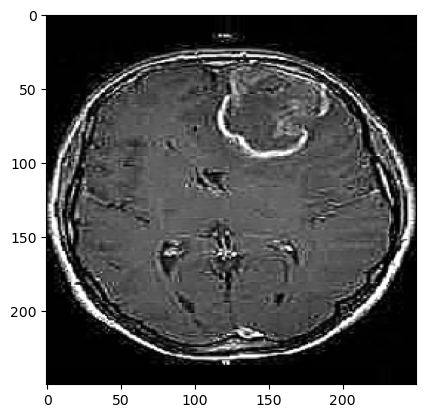

In [57]:
plt.imshow(training_batch[0][1])

In [33]:
val_batch = next(val_datagen)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


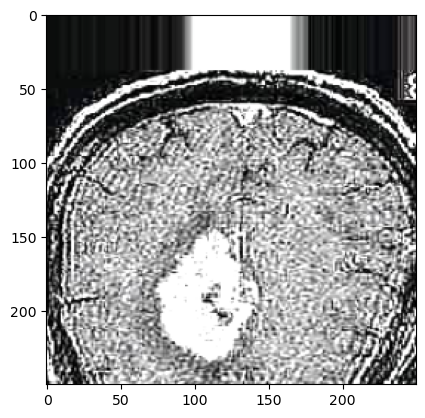

In [34]:
plt.imshow(val_batch[0][1])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


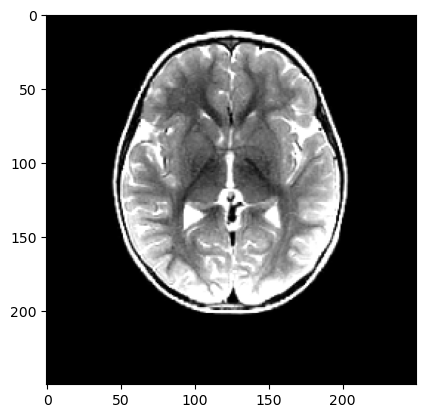

In [50]:
plt.imshow(training_batch[0][0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

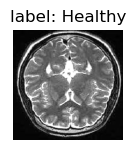

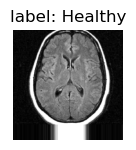

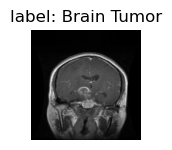

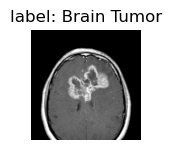

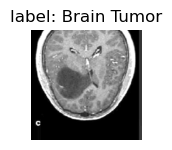

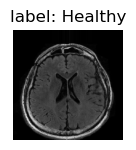

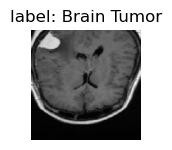

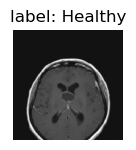

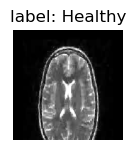

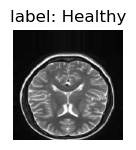

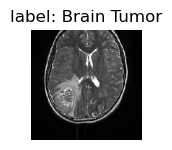

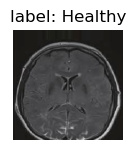

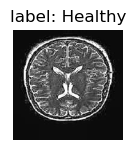

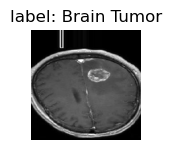

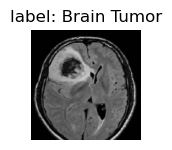

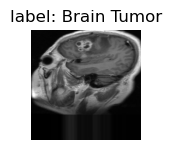

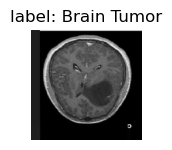

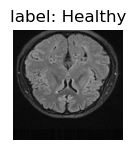

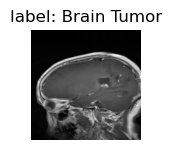

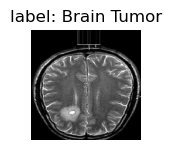

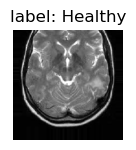

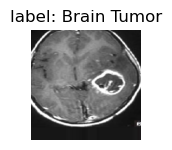

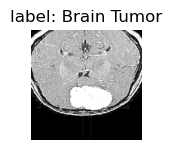

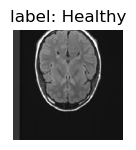

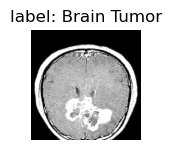

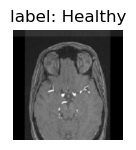

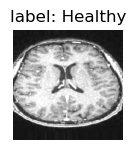

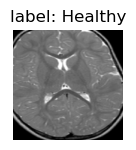

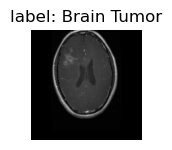

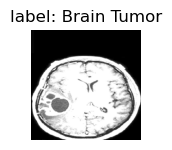

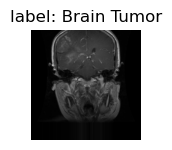

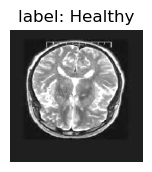

In [48]:
def training_Data_images(train_data_generator,class_names,batch_size=32):
    for i in range(batch_size):
        plt.figure(figsize=(20,10))
        plt.subplot(6,6,i+1) 
        batch = next(train_data_generator)
        image = batch[0][i]
        label = batch[1][i]
        plt.imshow(image)
        plt.title(f'label: {class_names[np.argmax(label)]}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()
    return train_data_generator


training_Data_images(train_data_generator,class_names)


In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

CNN = Sequential()
CNN.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(250,250,3)))
CNN.add(MaxPool2D(pool_size=(2,2)))

CNN.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
CNN.add(MaxPool2D(pool_size=(2,2)))
CNN.add(Flatten())

CNN.add(Dense(512,activation='relu'))
CNN.add(Dense(2,activation='softmax'))
CNN.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history = CNN.fit(train_data_generator,batch_size=32,epochs=10,validation_data=(val_datagen))



Epoch 1/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 880s 6s/step - accuracy: 0.5959 - loss: 1.8200 - val_accuracy: 0.7584 - val_loss: 0.5348
Epoch 2/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 862s 6s/step - accuracy: 0.7465 - loss: 0.5299 - val_accuracy: 0.7682 - val_loss: 0.5084
Epoch 3/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 890s 6s/step - accuracy: 0.7715 - loss: 0.4903 - val_accuracy: 0.7595 - val_loss: 0.4844
Epoch 4/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 902s 6s/step - accuracy: 0.7793 - loss: 0.4700 - val_accuracy: 0.7584 - val_loss: 0.4879
Epoch 5/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 892s 6s/step - accuracy: 0.7986 - loss: 0.4475 - val_accuracy: 0.8052 - val_loss: 0.4437
Epoch 6/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 888s 6s/step - accuracy: 0.7955 - loss: 0.4268 - val_accuracy: 0.7301 - val_loss: 0.5599
Epoch 7/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 888s 6s/step - accuracy: 0.7723 - loss: 0.4760 - val_accuracy: 0.7856 - val_loss: 0.4405
Epoch 8/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 929s 6s/step - accuracy: 0.8124 - loss: 0.4103 - val_accu

Training Accuracy: 0.8349999785423279
Validation Accuracy:  0.8063111901283264


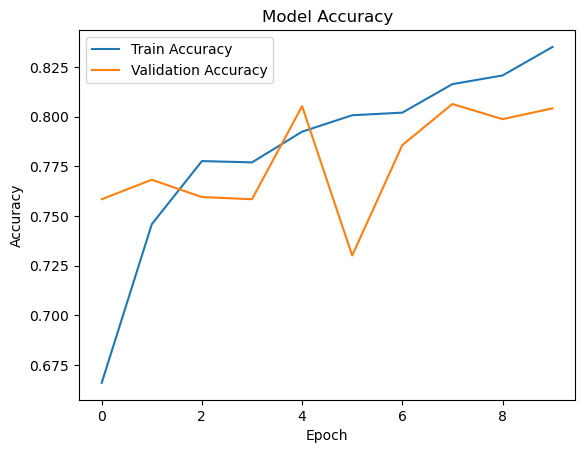

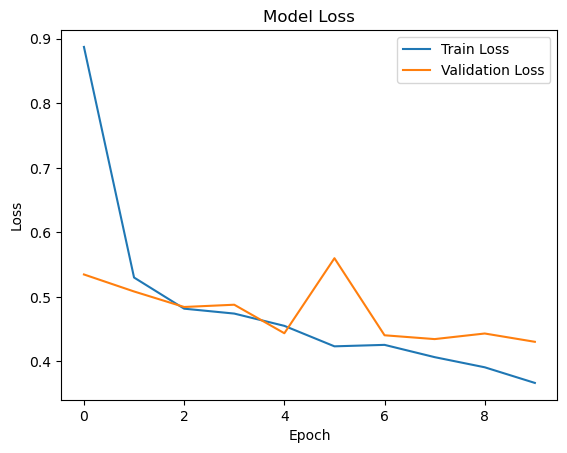

In [56]:
print("Training Accuracy:", max(history.history['accuracy']))
print("Validation Accuracy: ",max(history.history['val_accuracy']))



plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
#Not good. Started with RNNS and NLP before CNNs.